In [1]:
import seaborn as sns
sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


In [2]:
reading_session = pd.read_pickle("data/outdegree_reading_session.pkl")\
        .sort_values(["session_len", "position"])
reading_session = reading_session[reading_session.session_len<=15]
reading_session.head()

,session_len,position,average_out_degree,total_pageloads,stddev_out_degree,quantiles,median
48,1,0,184.202280,1711855805,235.962908,"[47, 107, 234]",107
62,2,0,200.730489,383042707,245.787499,"[54, 123, 261]",123
116,2,1,188.939685,383072057,240.437712,"[49, 110, 239]",110
16,3,0,212.965323,153377374,252.602044,"[60, 134, 282]",134
35,3,1,194.728776,153344060,243.568656,"[51, 116, 249]",116


In [3]:
random_walker = pd.read_pickle("data/outdegree_navigationtolast_random_walk.pkl")\
        .sort_values(["session_len", "position"])
random_walker = random_walker[random_walker.session_len<=15]
random_walker.head()

,session_len,position,average_out_degree,total_pageloads,stddev_out_degree,quantiles,median
68,2,0,238.975143,35043639,289.154363,"[69, 153, 312]",153
131,2,1,247.538871,35039749,310.421004,"[55, 135, 316]",135
18,3,0,249.573265,7891657,284.036455,"[74, 164, 330]",164
39,3,1,251.703063,7891657,312.202131,"[57, 140, 321]",140
103,3,2,254.632977,7890906,320.197187,"[56, 140, 325]",140


In [4]:
pathtolast = pd.read_pickle("data/outdegree_navigationtolast.pkl")\
        .sort_values(["path_length", "position"])
pathtolast = pathtolast[pathtolast.path_length<=15]
pathtolast.head()

,path_length,position,avg_total_links,total_pageloads,quantiles,median
168,1,0,191.066689,2952025038,"[49, 111, 244]",111
242,2,0,238.949310,584079842,"[69, 153, 312]",153
456,2,1,180.477085,583662788,"[48, 105, 226]",105
55,3,0,249.605564,131616620,"[74, 164, 330]",164
129,3,1,213.481366,131561396,"[60, 132, 276]",132


In [5]:
random_walker_biased = pd.read_pickle("data/outdegree_navigationtolast_random_walk_biased.pkl")\
        .sort_values(["session_len", "position"])
random_walker_biased = random_walker_biased[random_walker_biased.session_len<=15]
random_walker_biased.head()

,session_len,position,average_out_degree,total_pageloads,stddev_out_degree,quantiles,median
53,1,0,207.604888,70645001,253.002828,"[59, 128, 269]",128
69,2,0,281.921800,31915839,318.912536,"[92, 192, 366]",192
132,2,1,166.176322,31907678,209.716101,"[47, 98, 206]",98
18,3,0,304.653404,11235023,333.519231,"[103, 216, 400]",216
39,3,1,239.047482,11233088,282.815814,"[73, 153, 307]",153


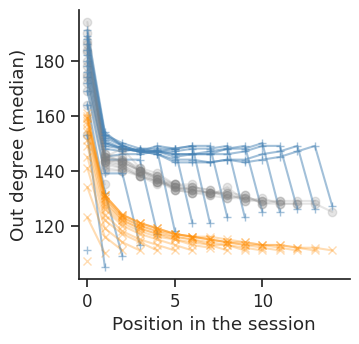

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))

y_value = "median"
for i in reading_session.session_len.unique():
    random_walker[(random_walker.session_len==i)]\
        .plot(x="position", 
              y=y_value, color="grey",
              label="Len: {}".format(i), alpha=0.2,
              ax=ax, marker="o")
    reading_session[(reading_session.session_len==i)]\
        .plot(x="position", 
              y=y_value, color="darkorange",
              label="Len: {}".format(i), alpha=0.3,
              ax=ax, marker="x")
    pathtolast[(pathtolast.path_length==i)]\
        .plot(x="position", 
              y=y_value, color="steelblue",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="+")
    
    
ax.set_xlabel("Position in the session")
ax.set_ylabel("Out degree (median)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.set_xlim((0,15))

reading_lines = Line2D([0], [0], color="darkorange", linewidth=1, marker="x")
random_lines = Line2D([0], [0], color="grey", linewidth=1, marker="o", alpha=0.5)
tolast_lines = Line2D([0], [0], color="steelblue", linewidth=1, marker="+")

ax.set_xlim((-0.5,15))
plt.xticks([0,5,10], [0,5,10])

labels = ["Reading sequence", "Navigation tree", "Random walker"]
plt.legend([reading_lines, tolast_lines, random_lines], labels, prop={'size': 9}, loc="upper right").remove()

fig.savefig('out_degree.pdf', dpi=fig.dpi, bbox_inches='tight')

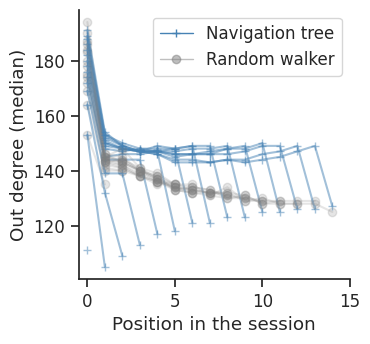

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))

y_value = "median"
for i in reading_session.session_len.unique():
    random_walker[(random_walker.session_len==i)]\
        .plot(x="position", 
              y=y_value, color="grey",
              label="Len: {}".format(i), alpha=0.2,
              ax=ax, marker="o")

    pathtolast[(pathtolast.path_length==i)]\
        .plot(x="position", 
              y=y_value, color="steelblue",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="+")
    
    
ax.set_xlabel("Position in the session")
ax.set_ylabel("Out degree (median)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.set_xlim((0,15))

# reading_lines = Line2D([0], [0], color="darkorange", linewidth=1, marker="x")
random_lines = Line2D([0], [0], color="grey", linewidth=1, marker="o", alpha=0.5)
tolast_lines = Line2D([0], [0], color="steelblue", linewidth=1, marker="+")

ax.set_xlim((-0.5,15))
plt.xticks([0,5,10,15], [0,5,10,15])

labels = ["Navigation tree", "Random walker"]
plt.legend([tolast_lines, random_lines], labels, prop={'size': 12}, loc="upper right")

fig.savefig('out_degree_slides.pdf', dpi=fig.dpi, bbox_inches='tight')

-----

In [8]:
reading_equal = pd.read_pickle("data/position_statistics_OutDegree_Reading_Equal_Representation.pkl")\
        .sort_values(["session_len", "position"])
reading_equal.head()

,session_len,position,average_out_degree,total_pageloads,stddev_out_degree,quantiles,median
48,1,0,109.811113,23122029,162.469837,"[23, 53, 131]",53
62,2,0,115.060536,5234677,168.362074,"[24, 56, 140]",56
116,2,1,248.828610,5275177,309.348959,"[54, 141, 322]",141
16,3,0,121.278312,2020139,173.320879,"[26, 60, 149]",60
35,3,1,253.867678,2030707,313.174535,"[57, 146, 329]",146


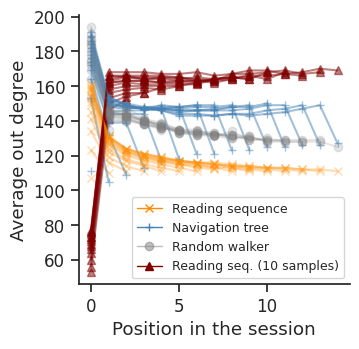

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))

y_value = "median"
for i in reading_session.session_len.unique():
    random_walker[(random_walker.session_len==i)]\
        .plot(x="position", 
              y=y_value, color="grey",
              label="Len: {}".format(i), alpha=0.2,
              ax=ax, marker="o")
    reading_session[(reading_session.session_len==i)]\
        .plot(x="position", 
              y=y_value, color="darkorange",
              label="Len: {}".format(i), alpha=0.3,
              ax=ax, marker="x")
    pathtolast[(pathtolast.path_length==i)]\
        .plot(x="position", 
              y=y_value, color="steelblue",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="+")
    reading_equal[(reading_equal.session_len==i)]\
        .plot(x="position", 
              y=y_value, color="maroon",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="^")
    
ax.set_xlabel("Position in the session")
ax.set_ylabel("Average out degree")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


reading_lines = Line2D([0], [0], color="darkorange", linewidth=1, marker="x")
random_lines = Line2D([0], [0], color="grey", linewidth=1, marker="o", alpha=0.5)
tolast_lines = Line2D([0], [0], color="steelblue", linewidth=1, marker="+")
equal_reading_lines = Line2D([0], [0], color="maroon", linewidth=1, marker="^")

labels = ["Reading sequence", "Navigation tree", "Random walker", "Reading seq. (10 samples)"]
plt.legend([reading_lines, tolast_lines, random_lines, equal_reading_lines],
           labels, prop={'size': 9}, loc="lower right")


---------

In [10]:
pagecentric_navigationtolast = pd.read_pickle("data/pagecentric_outdegree_navigationtolast.pkl")\
        .sort_values(["path_length", "position"])
pagecentric_navigationtolast = pagecentric_navigationtolast[pagecentric_navigationtolast.path_length<=15]
pagecentric_navigationtolast.head()

,path_length,position,avg_avg_total_links,avg_quantiles,total_articles,avg_median_total_links,median_quantiles,avg_median,median_median
168,1,0,41.868066,"[10.0, 19.0, 40.0]",5876353,41.868066,"[10, 19, 40]",19.000000,19.000000
242,2,0,51.546879,"[13.0, 25.0, 50.0]",4060713,51.546879,"[13, 25, 50]",25.000000,25.000000
456,2,1,139.750470,"[54.75, 105.70588235294117, 176.35064935064935]",4068712,98.746404,"[31, 61, 116]",105.705882,105.705882
55,3,0,62.140954,"[16.0, 31.0, 62.0]",2794822,62.140954,"[16, 31, 62]",31.000000,31.000000
129,3,1,148.346380,"[52.333333333333336, 107.17647058823529, 190.0]",2798983,115.228395,"[34, 69, 137]",107.176471,107.176471


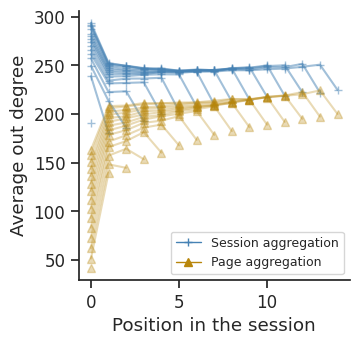

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))

y_value = "avg_total_links"
for i in reading_session.session_len.unique():
    pathtolast[(pathtolast.path_length==i)]\
        .plot(x="position", 
              y=y_value, color="steelblue",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="+")
    pagecentric_navigationtolast[(pagecentric_navigationtolast.path_length==i)]\
        .plot(x="position", 
              y="avg_avg_total_links", color="darkgoldenrod",
              label="Len: {}".format(i), alpha=0.3,
              ax=ax, marker="^")
    
ax.set_xlabel("Position in the session")
ax.set_ylabel("Average out degree")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.set_xlim((0,15))


tolast_lines = Line2D([0], [0], color="steelblue", linewidth=1, marker="+")
pagecentric_lines = Line2D([0], [0], color="darkgoldenrod", linewidth=1, marker="^")

labels = ["Session aggregation", "Page aggregation"]
plt.legend([tolast_lines, pagecentric_lines],
           labels, prop={'size': 9}, loc="lower right")


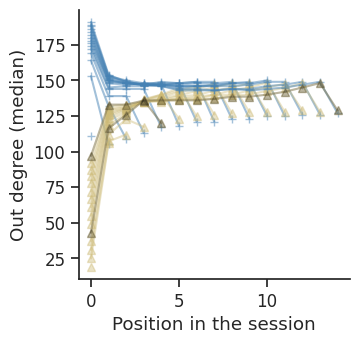

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))

y_value = "median"
for i in reading_session.session_len.unique():
    pathtolast[(pathtolast.path_length==i)]\
        .plot(x="position", 
              y=y_value, color="steelblue",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="+")
    pagecentric_navigationtolast[(pagecentric_navigationtolast.path_length==i)]\
        .plot(x="position", 
              y="median_median", color="y",
              label="Len: {}".format(i), alpha=0.4,
              ax=ax, marker="^")

pagecentric_navigationtolast[(pagecentric_navigationtolast.path_length==5)]\
    .plot(x="position", 
          y="median_median", color="black",
          label="Len: {}".format(i), alpha=0.2,
          ax=ax, marker="^")


pagecentric_navigationtolast[(pagecentric_navigationtolast.path_length==15)]\
    .plot(x="position", 
          y="median_median", color="black",
          label="Len: {}".format(i), alpha=0.2,
          ax=ax, marker="^")

    
ax.set_xlabel("Position in the session")
ax.set_ylabel("Out degree (median)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.set_xlim((0,15))


tolast_lines = Line2D([0], [0], color="steelblue", linewidth=1, marker="+")
pagecentric_lines = Line2D([0], [0], color="y", linewidth=1, marker="^")

labels = ["Session aggregation", "Page aggregation"]
plt.legend([tolast_lines, pagecentric_lines],
           labels, prop={'size': 9}, loc="lower right").remove()

fig.savefig('out_degree_micro_macro.pdf', dpi=fig.dpi, bbox_inches='tight')

-----------

In [13]:
random_walker_biased = pd.read_pickle("data/outdegree_navigationtolast_random_walk_biased.pkl")\
        .sort_values(["session_len", "position"])
random_walker_biased = random_walker_biased[(random_walker_biased.session_len<=15)
                                            &(random_walker_biased.session_len>1)]
random_walker_biased.head()

,session_len,position,average_out_degree,total_pageloads,stddev_out_degree,quantiles,median
69,2,0,281.921800,31915839,318.912536,"[92, 192, 366]",192
132,2,1,166.176322,31907678,209.716101,"[47, 98, 206]",98
18,3,0,304.653404,11235023,333.519231,"[103, 216, 400]",216
39,3,1,239.047482,11233088,282.815814,"[73, 153, 307]",153
104,3,2,168.798363,11232894,207.249567,"[48, 100, 212]",100


In [14]:
random_walker_biased_fixed = pd.read_pickle("data/outdegree_navigationtolast_random_walk_biased_fixed_len.pkl")\
        .sort_values(["session_len", "position"])
random_walker_biased_fixed = random_walker_biased_fixed[(random_walker_biased_fixed.session_len<=15)
                                            &(random_walker_biased_fixed.session_len>1)]
random_walker_biased_fixed.head()

,session_len,position,average_out_degree,total_pageloads,stddev_out_degree,quantiles,median
69,2,0,238.972034,87614753,289.331048,"[69, 153, 312]",153
132,2,1,185.942601,87592054,234.982111,"[50, 109, 234]",109
18,3,0,249.577576,19743346,284.509837,"[74, 164, 330]",164
39,3,1,197.197289,19739131,244.444034,"[54, 118, 250]",118
104,3,2,189.494318,19739518,236.157296,"[51, 111, 240]",111


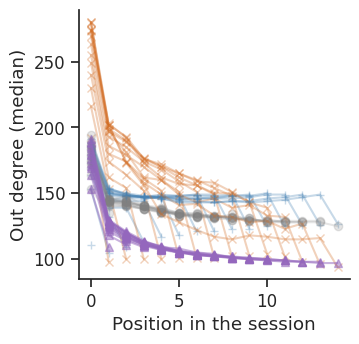

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(3.5,3.5))


for i in reading_session.session_len.unique():
    pathtolast[(pathtolast.path_length==i)]\
        .plot(x="position", 
              y=y_value, color="steelblue",
              label="Len: {}".format(i), alpha=0.3,
              ax=ax, marker="+")
    random_walker[(random_walker.session_len==i)]\
        .plot(x="position", 
              y="median", color="grey",
              label="Len: {}".format(i), alpha=0.2,
              ax=ax, marker="o")
    random_walker_biased[(random_walker_biased.session_len==i)]\
        .plot(x="position", 
              y="median", color="chocolate",
              label="Len: {}".format(i), alpha=0.3,
              ax=ax, marker="x")
    random_walker_biased_fixed[(random_walker_biased_fixed.session_len==i)]\
        .plot(x="position", 
              y="median", color="tab:purple",
              label="Len: {}".format(i), alpha=0.5,
              ax=ax, marker="^")
    
    
ax.set_xlabel("Position in the session")
ax.set_ylabel("Out degree (median)")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.legend().remove()

fig.savefig('out_degree_rw.pdf', dpi=fig.dpi, bbox_inches='tight')